# LP2 LINEAR REGRESSION PROJECT

# TEAM PARIS 

In [55]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as ndates

### Week 1 Task 

1. Have a clear understanding of the data , Develop at least 3 hypothesis and questions to help us achieve our objectives.


2. Preprocess the data - Transform data into a meaningful format

    a) Merge our datasets. But not using the train or test datasets. 
    
    b) Data cleaning: this step involves **identifying and removing missing, inconsistent, or irrelevant data.** This can             include **removing duplicate records, filling in missing values, and handling outliers.**
    
    c) Data transformation: this step involves **converting the data into a format that is more suitable for the data mining          task.** This can include normalizing numerical data, creating dummy variables, and **encoding categorical data.**
    
    d)Data discretization: this step is used to **convert continuous numerical data into categorical data,** which can be used       for decision tree and other categorical data mining techniques.


3. Develop and define business objectives - Do an EDA of the Dataset provided

In [56]:
# Read into our csv files 

transactions = pd.read_csv('transactions.csv', index_col=["date"], parse_dates=True)

train = pd.read_csv('train.csv', index_col=["date"], parse_dates=True)

test = pd.read_csv('test.csv', index_col=["date"], parse_dates=True)

store = pd.read_csv('stores.csv')

oil = pd.read_csv('oil.csv', index_col=["date"], parse_dates=True)

holiday_events = pd.read_csv('holidays_events.csv', index_col=["date"], parse_dates=True)

sample_submission = pd.read_csv('sample_submission.csv')

In [57]:
# LOOK AT THE COLUMNS 

In [58]:
transaction_columns = transactions.head(0)
store_columns =  store.head(0)
oil_columns =  oil.head(0)
holiday_columns = holiday_events.head(0)
sample_submission_columns = sample_submission.head(0)
train_cols = train.head(0)
test_cols = test.head(0)

columns_list = [transaction_columns, store_columns, oil_columns, holiday_columns , sample_submission_columns , train_cols, test_cols]

#columns_list



# CLEANING INDIVIDUAL DATASETS BEFORE PD.CONCAT

# EDA ANALYSIS ON INDIVIDUAL DATASETS

# 1. TRANSACTION CLEANING

In [59]:
transactions.head()

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922


In [60]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83488 entries, 2013-01-01 to 2017-08-15
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   store_nbr     83488 non-null  int64
 1   transactions  83488 non-null  int64
dtypes: int64(2)
memory usage: 1.9 MB


In [61]:
# Checking for duplicate values 

**Issues with the transactions dataset** 

1. Change the date column from **object** to **Date series**
2. Set the date column as the index
3. There are no null values 

### b) TRANSACTIONS EDA ANALYSIS 

In [62]:
transactions.head(3)

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358


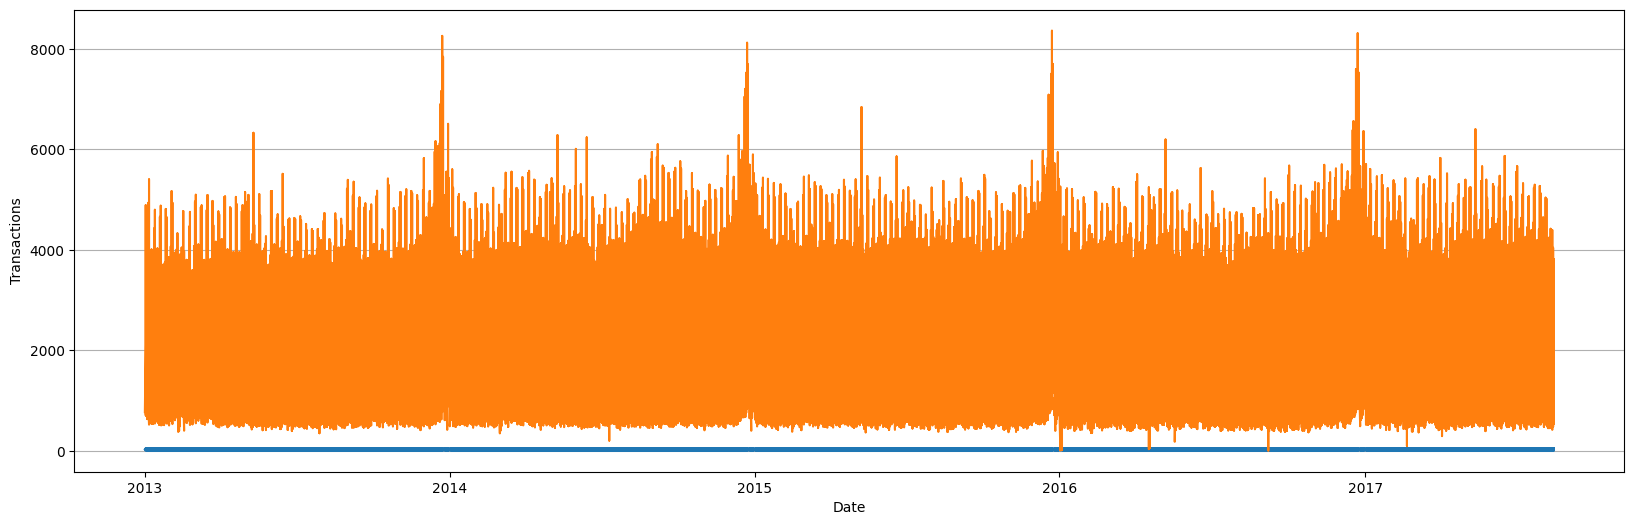

In [63]:
plt.figure(figsize=(20, 6))
plt.plot(transactions)
plt.grid(axis="y")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.show()

Text(0.5, 1.0, '2015 transactions')

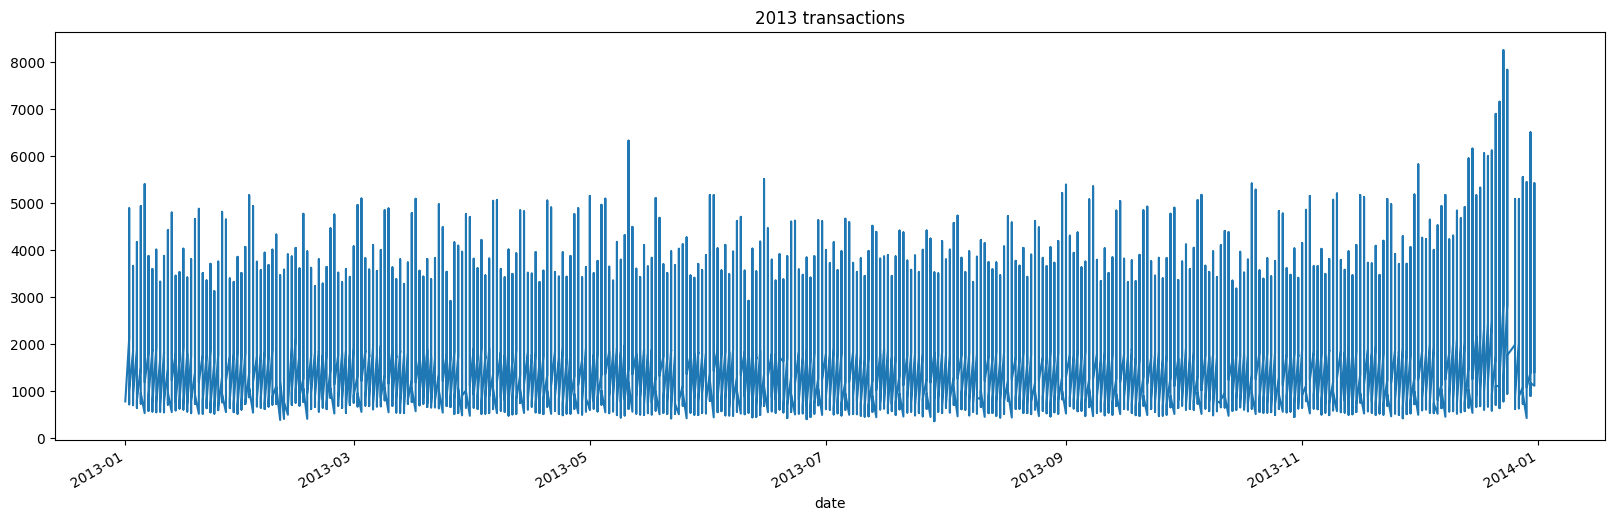

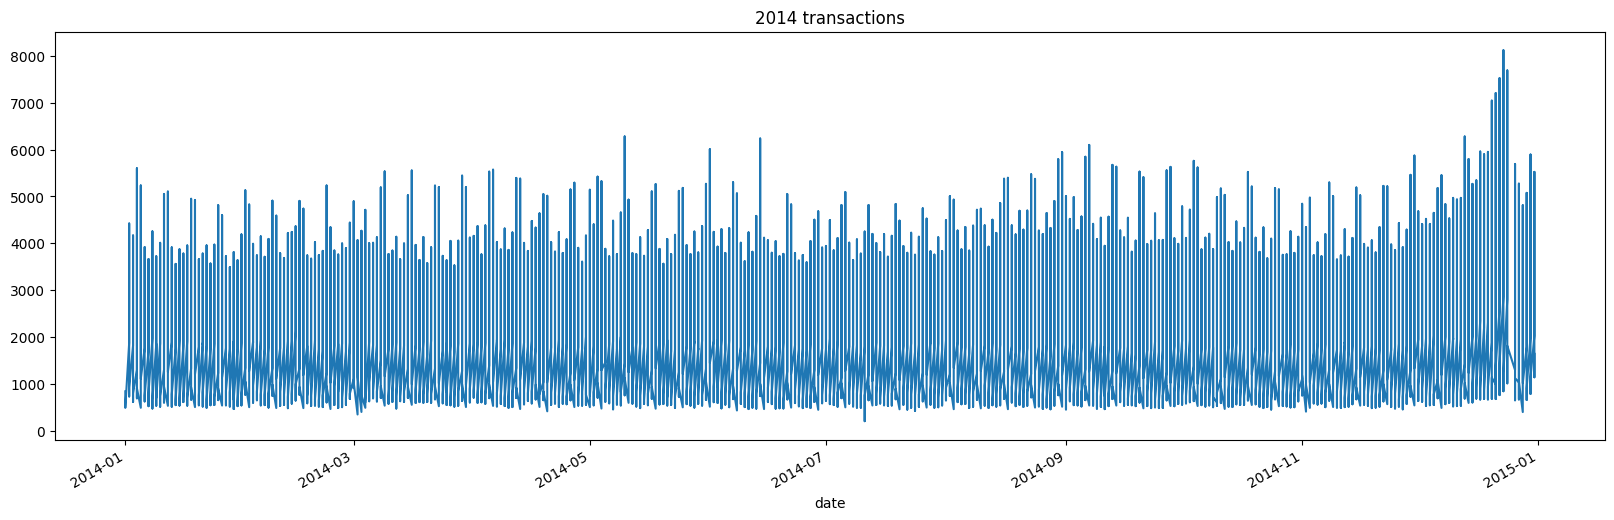

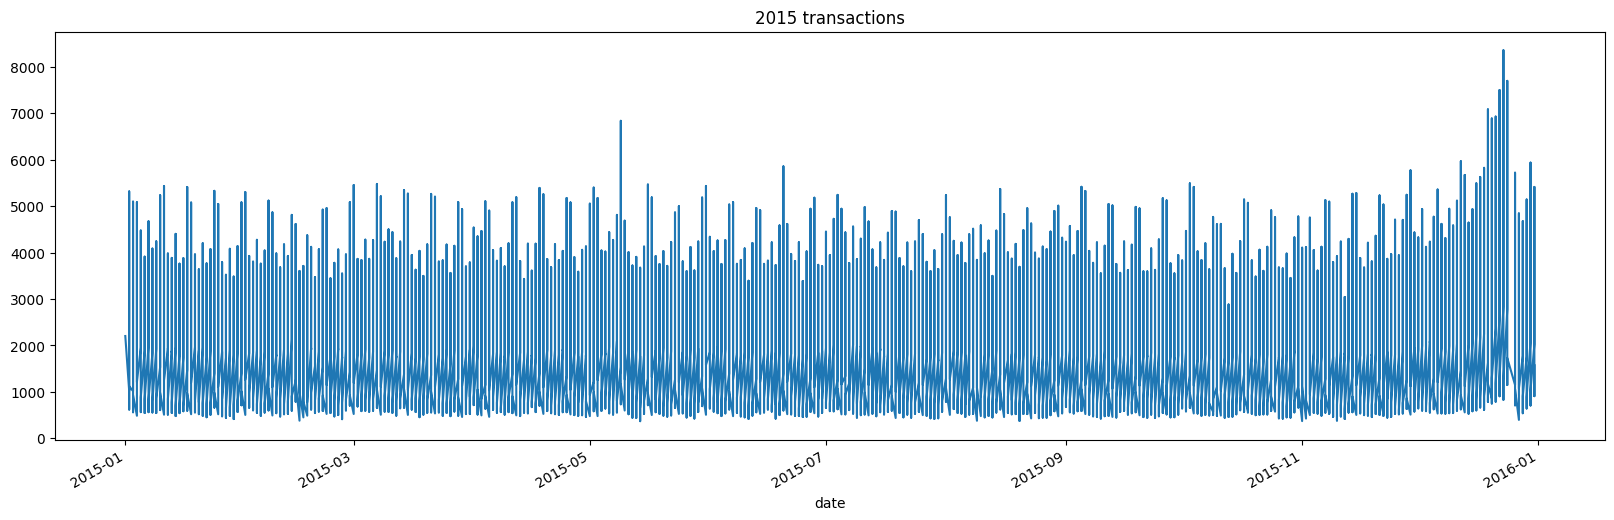

In [64]:
# Checking yearly trend 

plt.figure(figsize=(20,6))
ax = transactions.loc ['2013', 'transactions' ].plot()
#ax.set_xlabel['TRANSACTIONS IN 2013 MONTHLY']
plt.title('2013 transactions')

plt.figure(figsize=(20,6))
ax = transactions.loc ['2014', 'transactions' ].plot()
#ax.set_xlabel['TRANSACTIONS IN 2014 MONTHLY']
plt.title('2014 transactions')

plt.figure(figsize=(20,6))
ax = transactions.loc ['2015', 'transactions' ].plot()
#ax.set_xlabel['TRANSACTIONS IN 2015 MONTHLY']
plt.title('2015 transactions')

**Observations**

1. There's a spike in the number of transactions at the begining of every year.

   i.e; The highest number of transactions are experienced at the end of every year
   

2. There is a general steady seasonality in our dataset, Since there's a recurring pattern in our dataset

# 2. STORE CLEEANING 

In [65]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [66]:
store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [67]:
store['store_nbr'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [68]:
# Checking for duplicate values 

**Issues with our dataset**

1. No null values 
2. cluster column is not categorical but continuous

In [69]:
store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


# 3. OIL CLEANING

In [70]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [71]:
oil.shape

(1218, 1)

In [72]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [73]:
# Rename 'dcoilwitco' to 'DC-OIL-WICTO-CORPORATION'

oil.rename(columns = {'dcoilwitco':'DC-OIL-WICTO-CORPORATION'}, inplace = True)

In [74]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [75]:
oil['dcoilwtico'].isna().sum()

43

**Issues with our data** 

1. 43 missing values in the **'dcoilwtico'** column
2. Set the date as the index
3. Rename **dcoilwtco** column
4. Change the dtype of the Date column

## FILL 43 MISSING VALUES

In [76]:
# Check the range of the values within that column

oil['dcoilwtico'].tail(20)

date
2017-08-04    49.57
2017-08-07    49.37
2017-08-08    49.07
2017-08-09    49.59
2017-08-10    48.54
2017-08-11    48.81
2017-08-14    47.59
2017-08-15    47.57
2017-08-16    46.80
2017-08-17    47.07
2017-08-18    48.59
2017-08-21    47.39
2017-08-22    47.65
2017-08-23    48.45
2017-08-24    47.24
2017-08-25    47.65
2017-08-28    46.40
2017-08-29    46.46
2017-08-30    45.96
2017-08-31    47.26
Name: dcoilwtico, dtype: float64

In [77]:
with pd.option_context('display.max_rows', None):
    print(oil['dcoilwtico'])

date
2013-01-01       NaN
2013-01-02     93.14
2013-01-03     92.97
2013-01-04     93.12
2013-01-07     93.20
2013-01-08     93.21
2013-01-09     93.08
2013-01-10     93.81
2013-01-11     93.60
2013-01-14     94.27
2013-01-15     93.26
2013-01-16     94.28
2013-01-17     95.49
2013-01-18     95.61
2013-01-21       NaN
2013-01-22     96.09
2013-01-23     95.06
2013-01-24     95.35
2013-01-25     95.15
2013-01-28     95.95
2013-01-29     97.62
2013-01-30     97.98
2013-01-31     97.65
2013-02-01     97.46
2013-02-04     96.21
2013-02-05     96.68
2013-02-06     96.44
2013-02-07     95.84
2013-02-08     95.71
2013-02-11     97.01
2013-02-12     97.48
2013-02-13     97.03
2013-02-14     97.30
2013-02-15     95.95
2013-02-18       NaN
2013-02-19     96.69
2013-02-20     94.92
2013-02-21     92.79
2013-02-22     93.12
2013-02-25     92.74
2013-02-26     92.63
2013-02-27     92.84
2013-02-28     92.03
2013-03-01     90.71
2013-03-04     90.13
2013-03-05     90.88
2013-03-06     90.47
2013-03-

In [78]:
oil['dcoilwtico'].mean()

67.71436595744682

In [79]:
oil['dcoilwtico'].median()

53.19

**NB**

 Since our dataset is arranged almost in **an ascending order / descending order** , For our missing values we will fill in with the previous value since they are almost the same, The mean / median will skew our dataset 

In [80]:
oil['dcoilwtico'].fillna( method = 'ffill', inplace = True)

In [81]:
# our first value we will fill with the previous value

oil['dcoilwtico'].isna().sum()

1

In [82]:
oil['dcoilwtico'].fillna( 93.14 , inplace = True)

In [83]:
oil['dcoilwtico'].isna().sum()

0

## OIL EDA ANALYSIS

In [84]:
oil.head()

,dcoilwtico
date,
2013-01-01,93.14
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


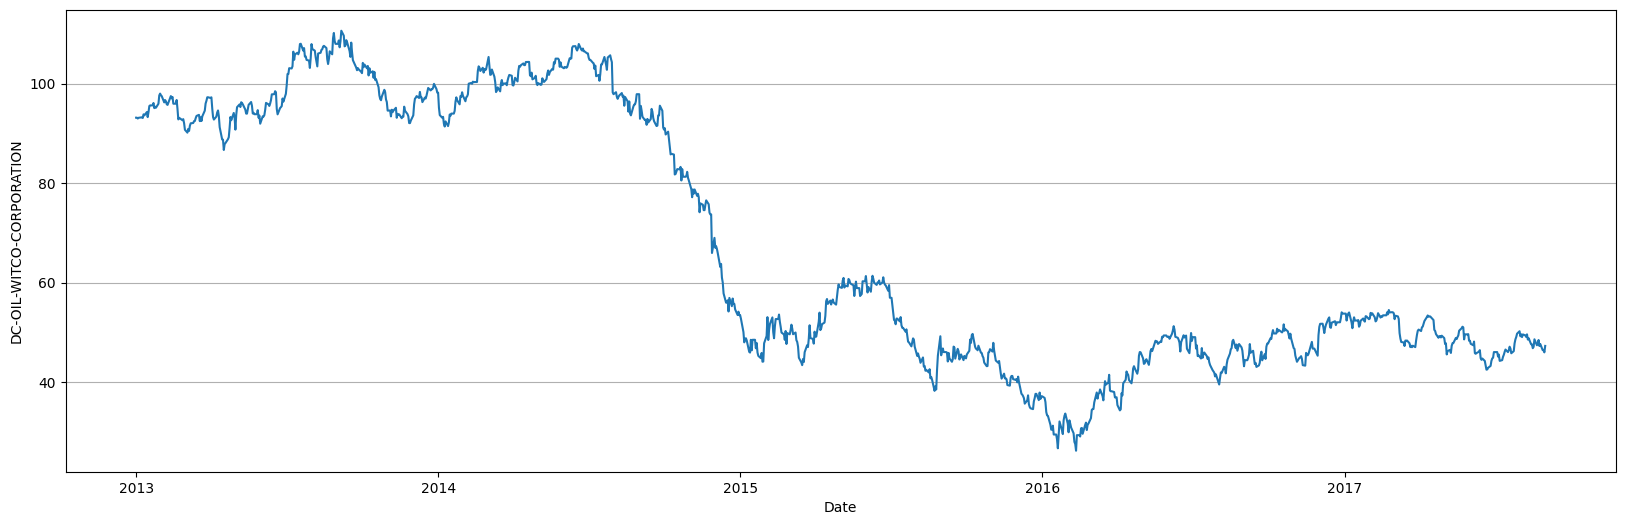

In [85]:
plt.figure(figsize=(20, 6))
plt.plot(oil)
plt.grid(axis="y")
plt.xlabel("Date")
plt.ylabel("DC-OIL-WITCO-CORPORATION")
plt.show()

**Observations**

1. There has been a general decrease **trend** over the years , with the sharp decrease peak experienced **at the end of 2014 year**


2. Depending on each year in our dataset's average, there has been a **seasonality mid year** where the oil prices go up. 
   I.e, the highest oil prices have been experienced mid year

# 4. SAMPLE_SUBMISSION CLEANING 

In [86]:
sample_submission.shape

(28512, 2)

In [87]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [88]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [89]:
sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [90]:
sample_submission.isna().sum()

id       0
sales    0
dtype: int64

**Issues with ou dataset**

1. No null values in the dataet 


# 5. HOLIDAY EVENTS CLEANING 

In [91]:
holiday_events.head()

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [92]:
holiday_events.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 350 entries, 2012-03-02 to 2017-12-26
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         350 non-null    object
 1   locale       350 non-null    object
 2   locale_name  350 non-null    object
 3   description  350 non-null    object
 4   transferred  350 non-null    bool  
dtypes: bool(1), object(4)
memory usage: 14.0+ KB


In [93]:
holiday_events.isna().sum()

type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [94]:
holiday_events.shape

(350, 5)

In [95]:
# Check for the holidays 

unique_holidays = holiday_events['type'].unique()
print(unique_holidays)

['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']


In [96]:
local_ = holiday_events.loc[holiday_events['locale'] == 'Local']

regional_ = holiday_events.loc[holiday_events['locale'] == 'Regional']

national_ =  holiday_events.loc[holiday_events['locale'] == 'National']


print ('Number of local holidays ', local_.shape)
print ('Number of regional holidays ', regional_.shape)
print ('Number of national holidays ', national_.shape)

Number of local holidays  (152, 5)
Number of regional holidays  (24, 5)
Number of national holidays  (174, 5)


**Issues withe the data**

1. Figure out which type of holidays , and which holidays affect oil sales significantly 


2. Group our holidays per the month to see which holidays will fall mid month since that is when the least sales is experienced  
                                                                   
                                                                                                                                                                                                                                             

# 6. TRAIN and TEST  DATASET

## a) Train

In [97]:
train.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [99]:
train.isna().sum()

id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

## b) Test 

In [100]:
test.head()

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-16,3000889,1,BABY CARE,0
2017-08-16,3000890,1,BEAUTY,2
2017-08-16,3000891,1,BEVERAGES,20
2017-08-16,3000892,1,BOOKS,0


In [101]:
test.isna().sum()

id             0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28512 entries, 2017-08-16 to 2017-08-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   store_nbr    28512 non-null  int64 
 2   family       28512 non-null  object
 3   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


# POINTS TO NOTE 

1. **SPLITTING DATASETS** 

  Because we have both have test and train datasets, we wont split our training datasets into 80:20,  since we have a testing     dataset we wont need to split our datasets. 
  
  
  
2. **X AND Y variables**

   Since we will be predicting sales, sales will be our y variables. 

# Merge our datasets 

In [103]:
#Merge everything save for the test dataset without splitting any data

train_1 = pd.concat([train,transactions , store, oil, holiday_events ], ignore_index = True)

In [104]:
train_1.shape

(3114510, 15)

In [105]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114510 entries, 0 to 3114509
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_nbr     float64
 1   transactions  float64
 2   city          object 
 3   state         object 
 4   type          object 
 5   cluster       float64
 6   dcoilwtico    float64
 7   locale        object 
 8   locale_name   object 
 9   description   object 
 10  transferred   object 
 11  id            float64
 12  sales         float64
 13  family        object 
 14  onpromotion   float64
dtypes: float64(7), object(8)
memory usage: 356.4+ MB


In [106]:
train_1.describe

<bound method NDFrame.describe of          store_nbr  transactions city state type  cluster  dcoilwtico locale  \
0             25.0         770.0  NaN   NaN  NaN      NaN         NaN    NaN   
1              1.0        2111.0  NaN   NaN  NaN      NaN         NaN    NaN   
2              2.0        2358.0  NaN   NaN  NaN      NaN         NaN    NaN   
3              3.0        3487.0  NaN   NaN  NaN      NaN         NaN    NaN   
4              4.0        1922.0  NaN   NaN  NaN      NaN         NaN    NaN   
...            ...           ...  ...   ...  ...      ...         ...    ...   
3114505        9.0           NaN  NaN   NaN  NaN      NaN         NaN    NaN   
3114506        9.0           NaN  NaN   NaN  NaN      NaN         NaN    NaN   
3114507        9.0           NaN  NaN   NaN  NaN      NaN         NaN    NaN   
3114508        9.0           NaN  NaN   NaN  NaN      NaN         NaN    NaN   
3114509        9.0           NaN  NaN   NaN  NaN      NaN         NaN    NaN   

     

In [107]:
train_1.head(3)

,store_nbr,transactions,city,state,type,cluster,dcoilwtico,locale,locale_name,description,transferred,id,sales,family,onpromotion
0,25.0,770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# print('store na' , train_1['store_nbr'].isna().sum())
# print ( 'transactions na' ,train_1['transactions'].isna().sum())
# print ( 'city',  train_1['city'].isna().sum())
# print ( 'state na',  train_1['state'].isna().sum())
# print ('cluster', train_1(['cluster'].isna().sum())
# #train_1['dcoilwtico'].isna().sum())
# #print ( 'locale na', train_1['locale'].isna().sum())
# print ( 'locale name na ' ,train_1['locale_name'].isna().sum())
# print ( 'description na ', train_1['description'].isna().sum())
# print ( 'transferred na',  train_1['transferred'].isna().sum())
# print ( 'id na()',  train_1['id'].isna().sum())
# print ( 'sales na ()', train_1['sales'].isna().sum())
# print ( 'family na()', train_1['family'].isna().sum())
# # print (  'family na()' , train_1['onpromotion'].isna().sum())

In [109]:
# k = train_1.head(0)